<a href="https://www.kaggle.com/code/itsnahm/machine-learning-model-for-titanic-disaster?scriptVersionId=109830939" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
example = pd.read_csv('../input/titanic/gender_submission.csv')

# Expolaroty Data Analysis (EDA) 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:ylabel='Survived'>

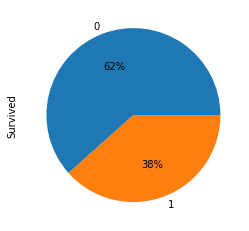

In [6]:
train['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

From dataset train, we know that target variable/LABEL has imbalanced data with majority of passengers who not survived.

<AxesSubplot:ylabel='Survived'>

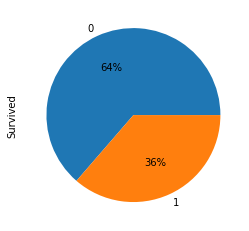

In [7]:
example['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [11]:
train.shape

(891, 12)

In [12]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.shape

(418, 11)

In [14]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
numeric_column = train.select_dtypes(include=[np.number]).columns
categoric_column = train.select_dtypes(exclude=[np.number]).columns

In [16]:
numeric_column = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
categoric_column

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin', ylabel='count'>

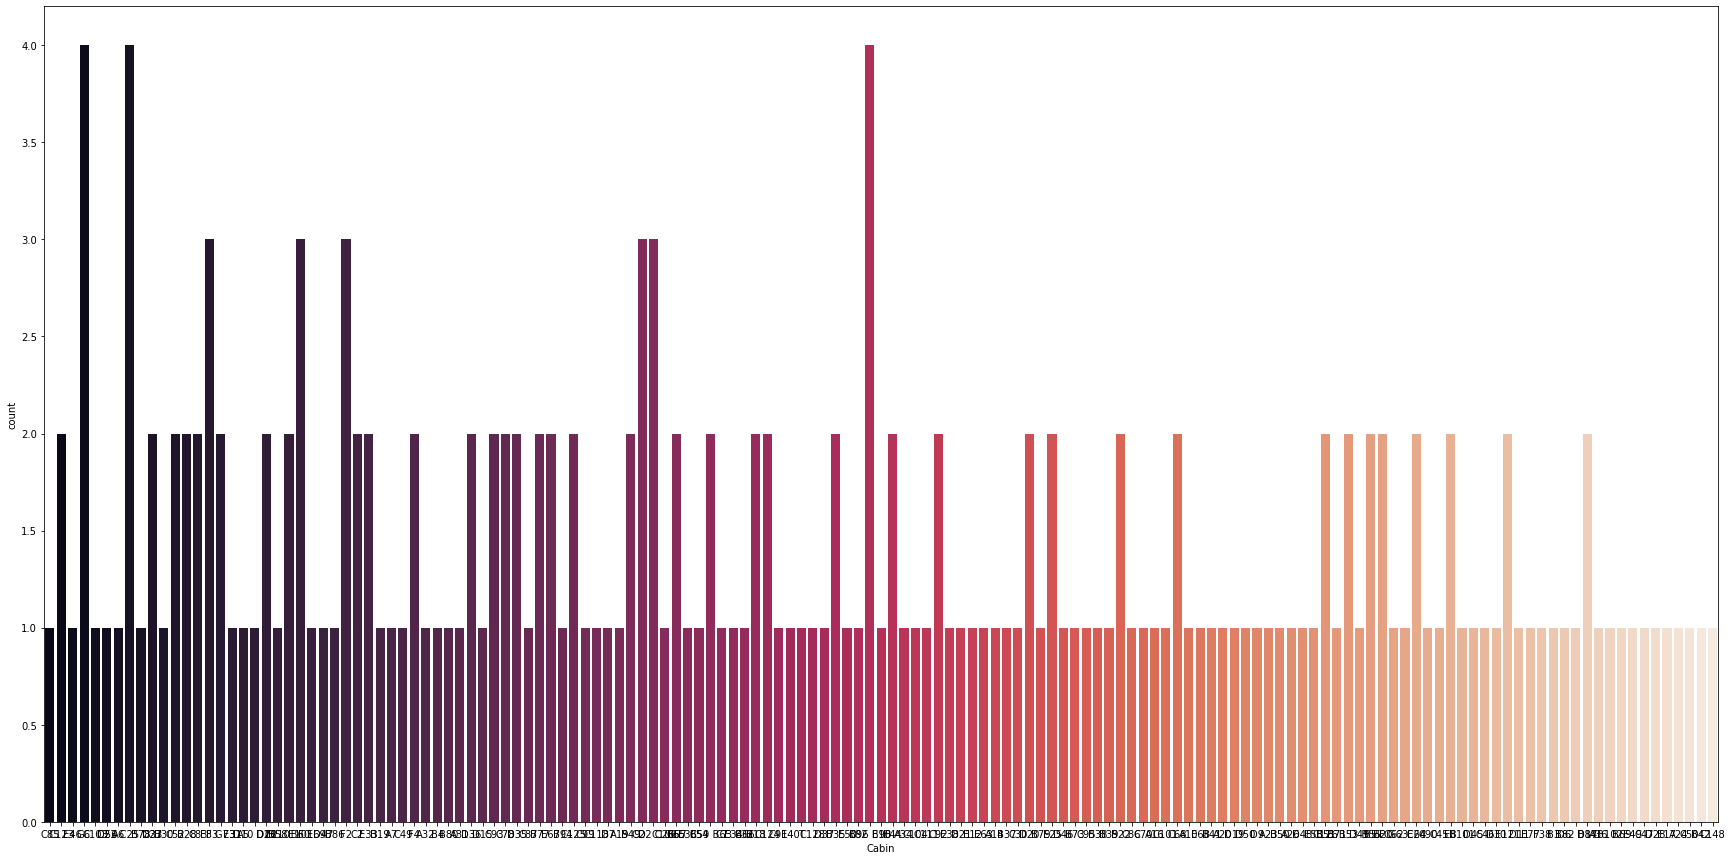

In [19]:
plt.rcParams['figure.figsize'] = (30,15)
sns.countplot(train['Cabin'], palette = 'rocket')

Delete column Name, Ticket, and Cabin because those columns have too many unique values.

In [20]:
del train['Name']
del train['Ticket']
del train['Cabin']

del test['Name']
del test['Ticket']
del test['Cabin']

Join SibSp and Parch columns as 'Family' column because SibSp and Parch value mean that the passenger has families in the ship either. Then drop SibSP and Parch columns

In [21]:
train['Family'] = train['SibSp'] + train['Parch']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Family', ylabel='count'>

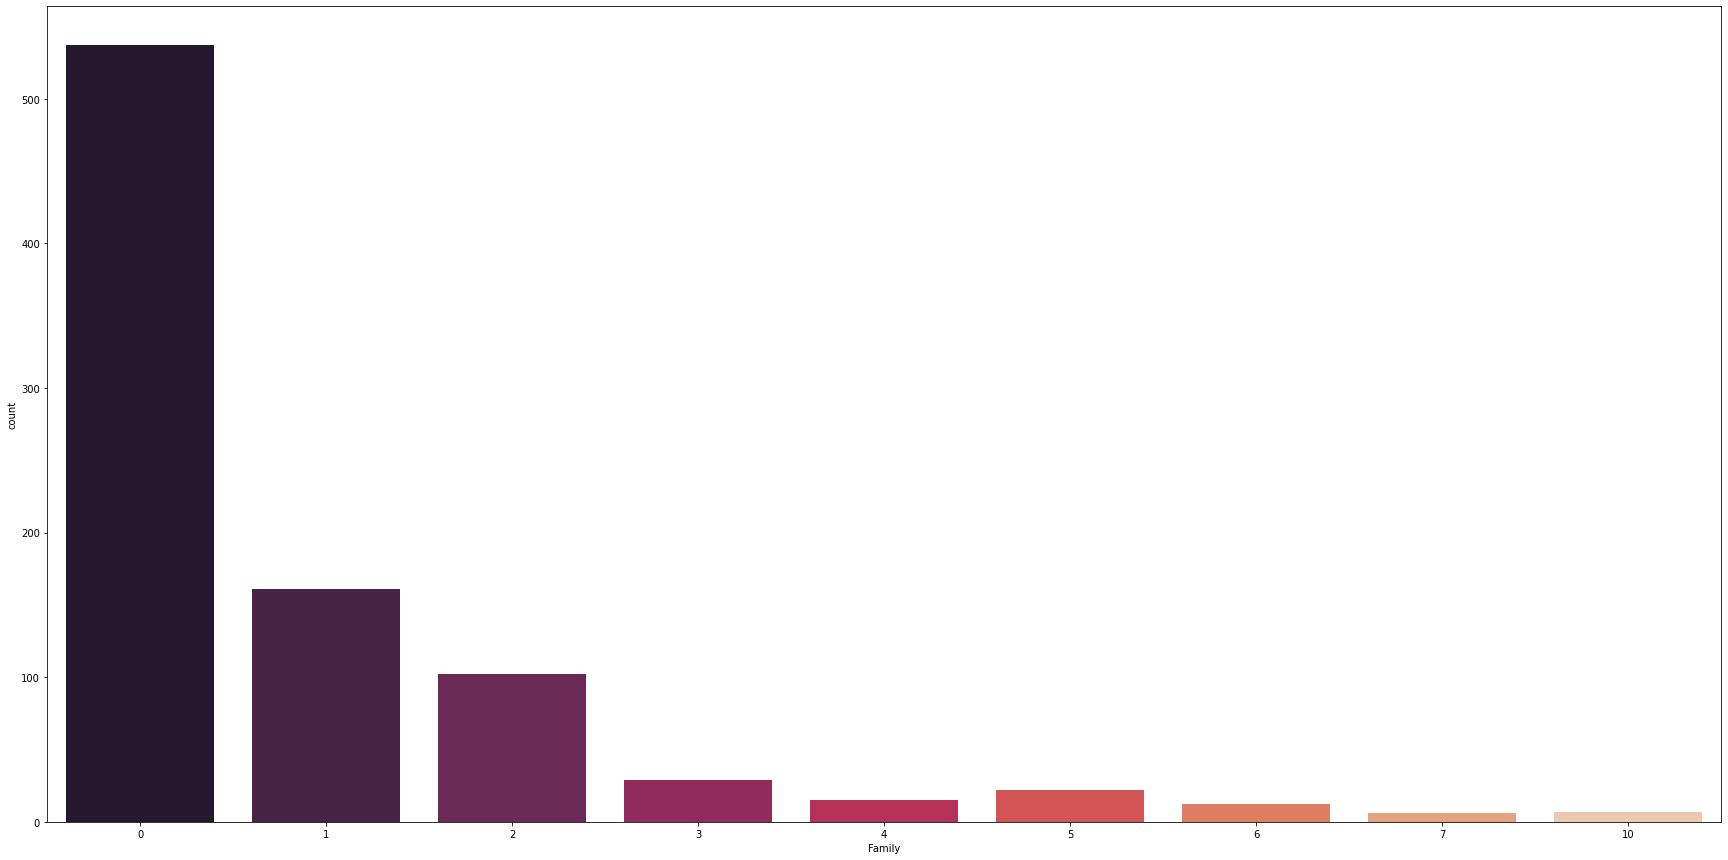

In [22]:
plt.rcParams['figure.figsize'] = (30,15)
sns.countplot(train['Family'], palette = 'rocket')

In [23]:
del train['SibSp']
del train['Parch']

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   Family       891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [25]:
test['Family'] = test['SibSp'] + test['Parch']

In [26]:
del test['SibSp']
del test['Parch']

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   Family       418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

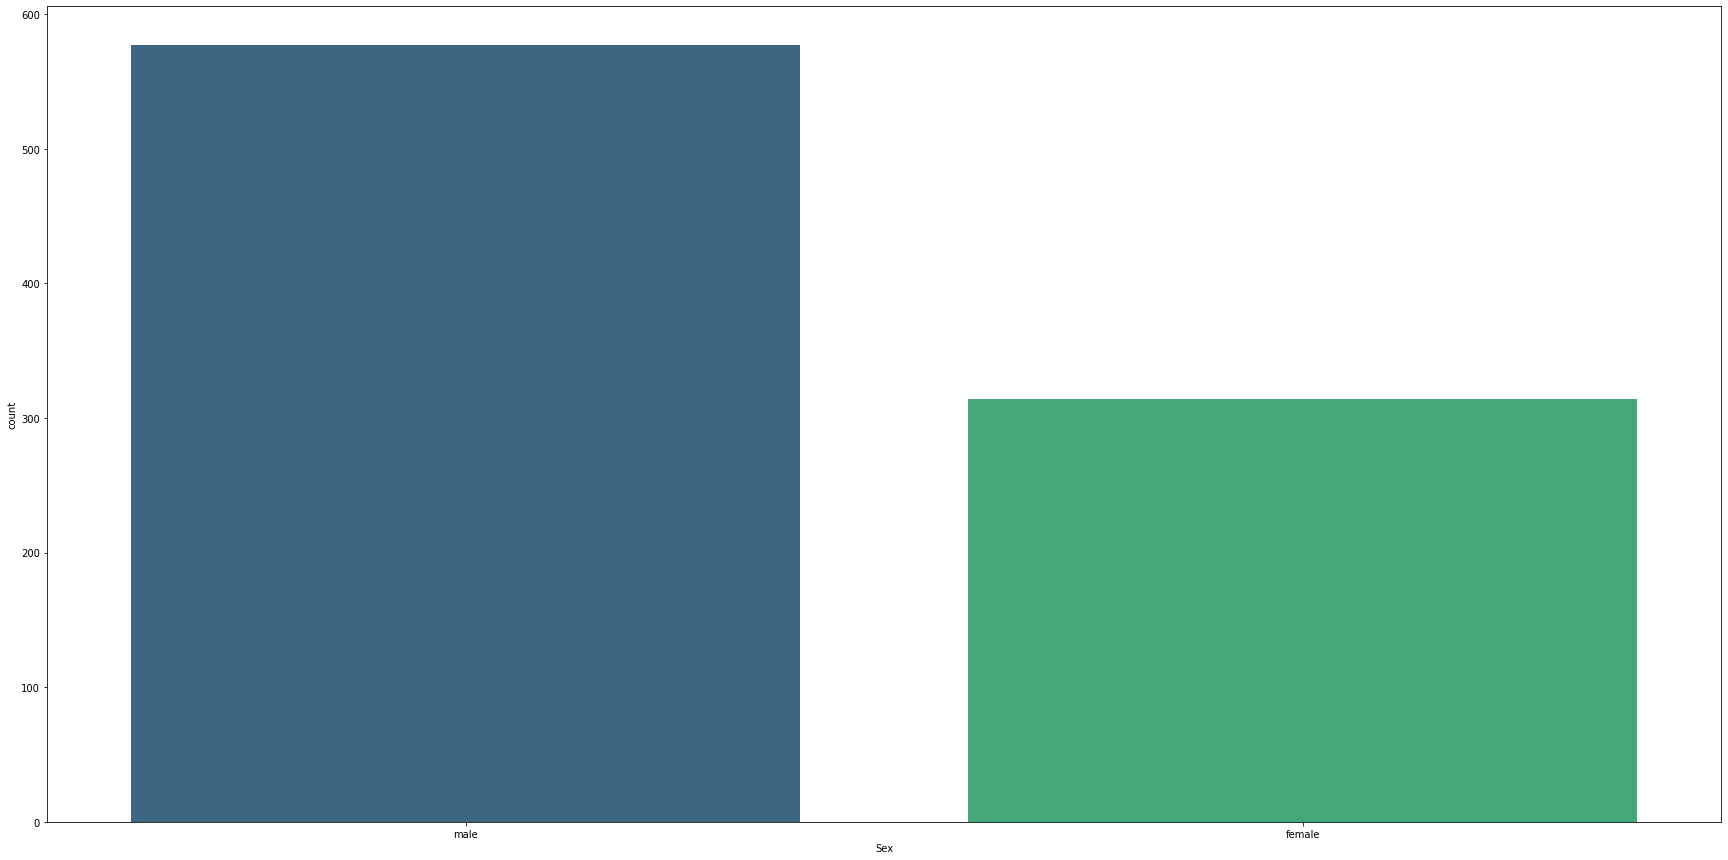

In [28]:
sns.countplot(data = train, x = 'Sex', palette='viridis')

<AxesSubplot:xlabel='Family', ylabel='count'>

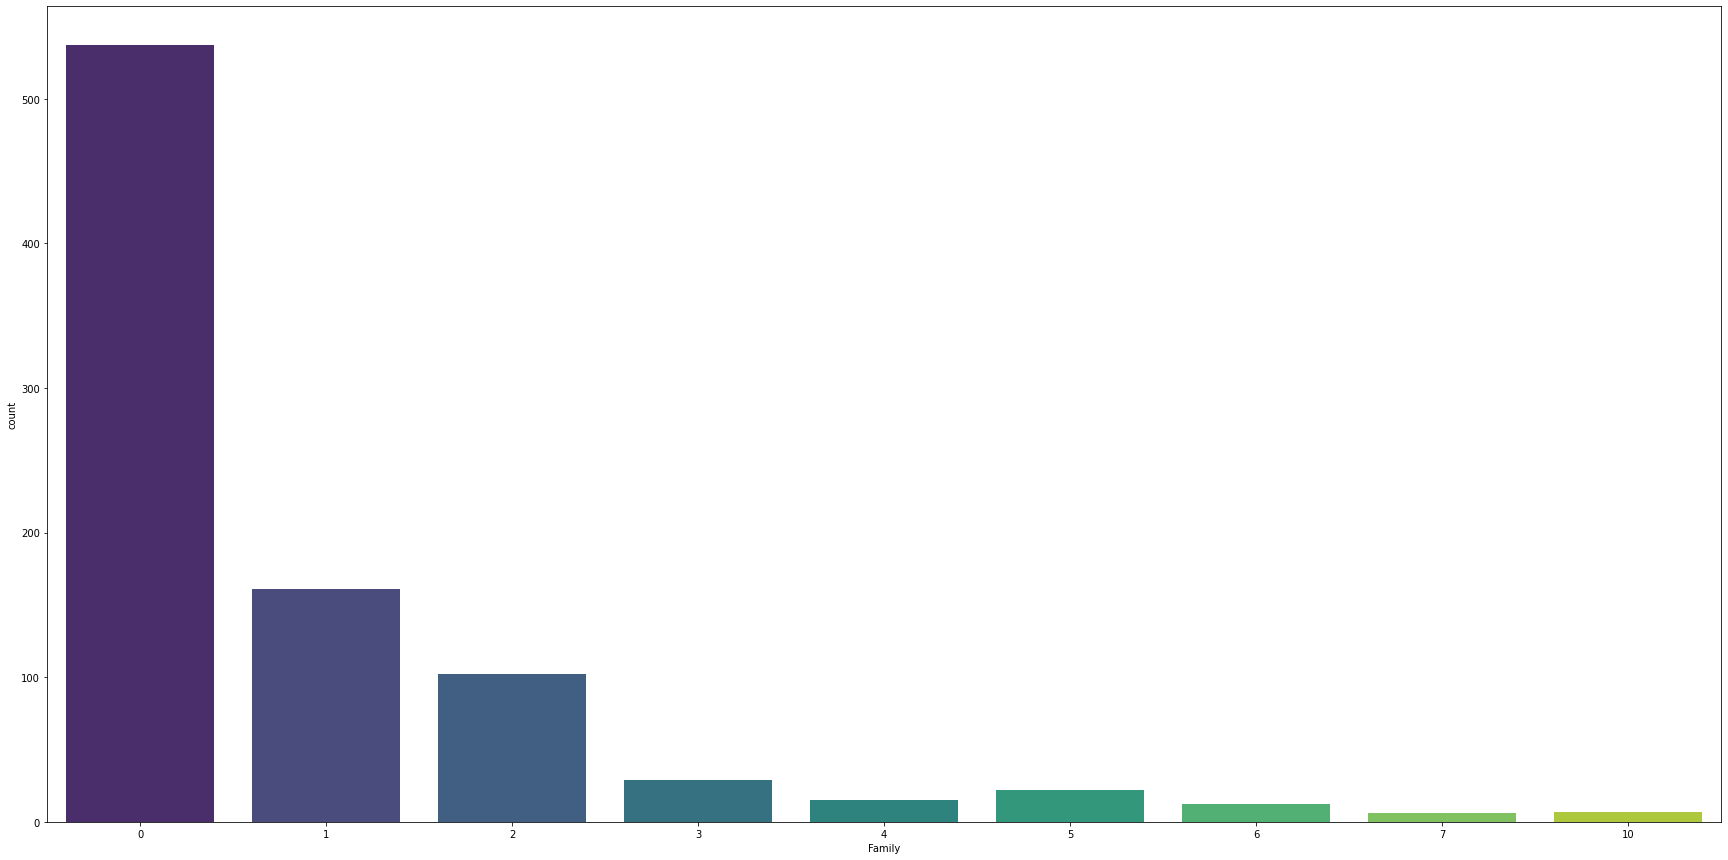

In [29]:
sns.countplot(data = train, x = 'Family', palette='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

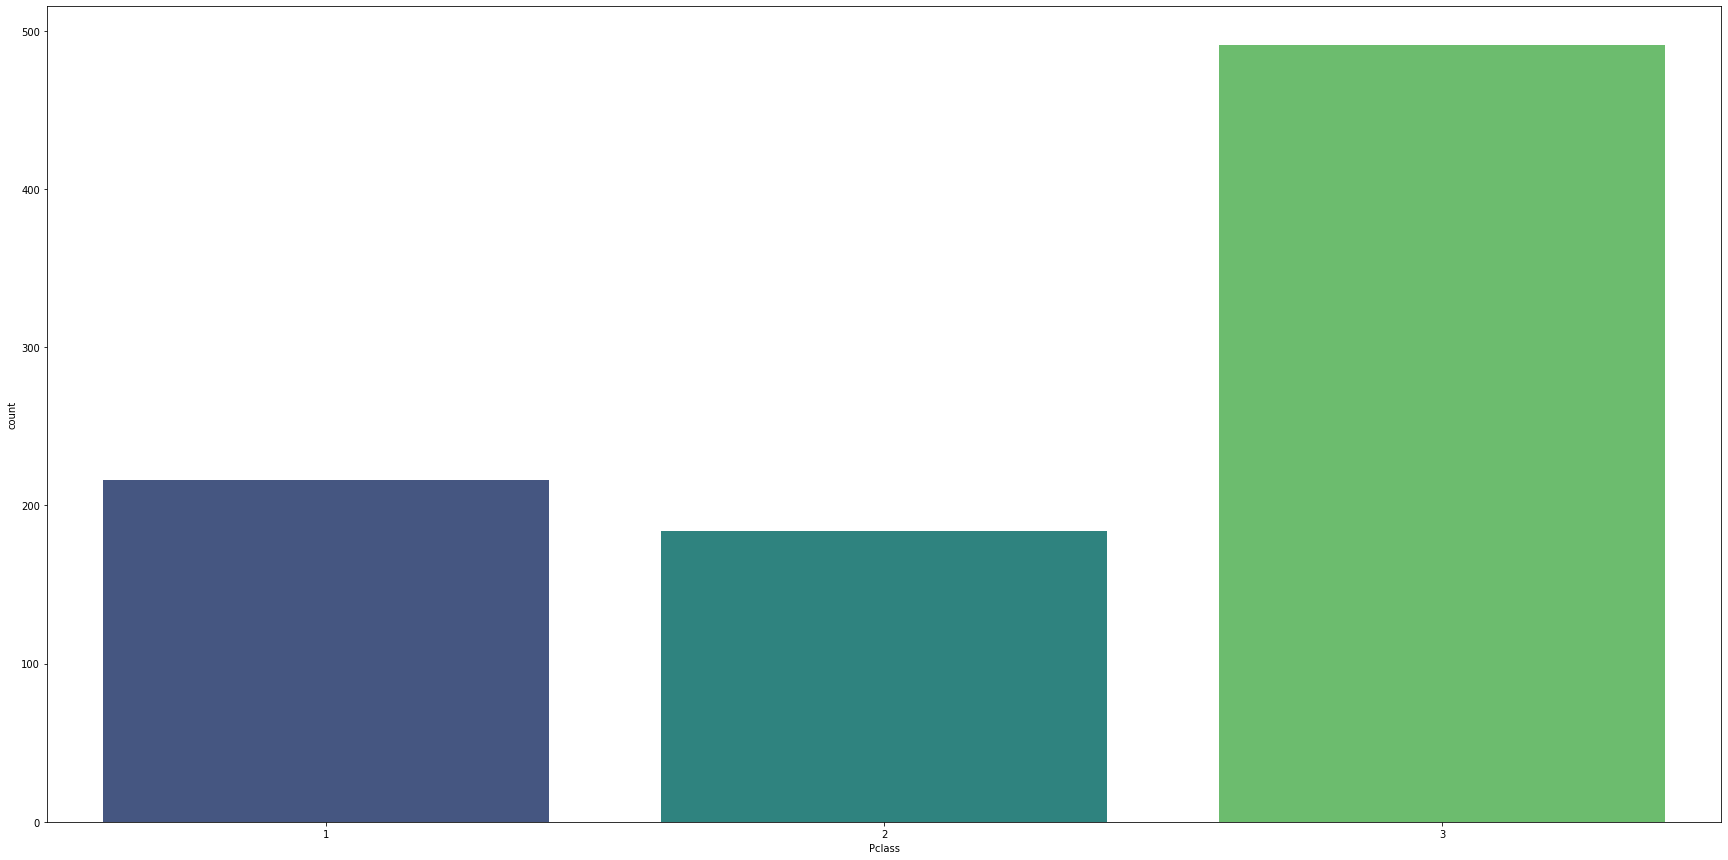

In [30]:
sns.countplot(data = train, x = 'Pclass', palette='viridis')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

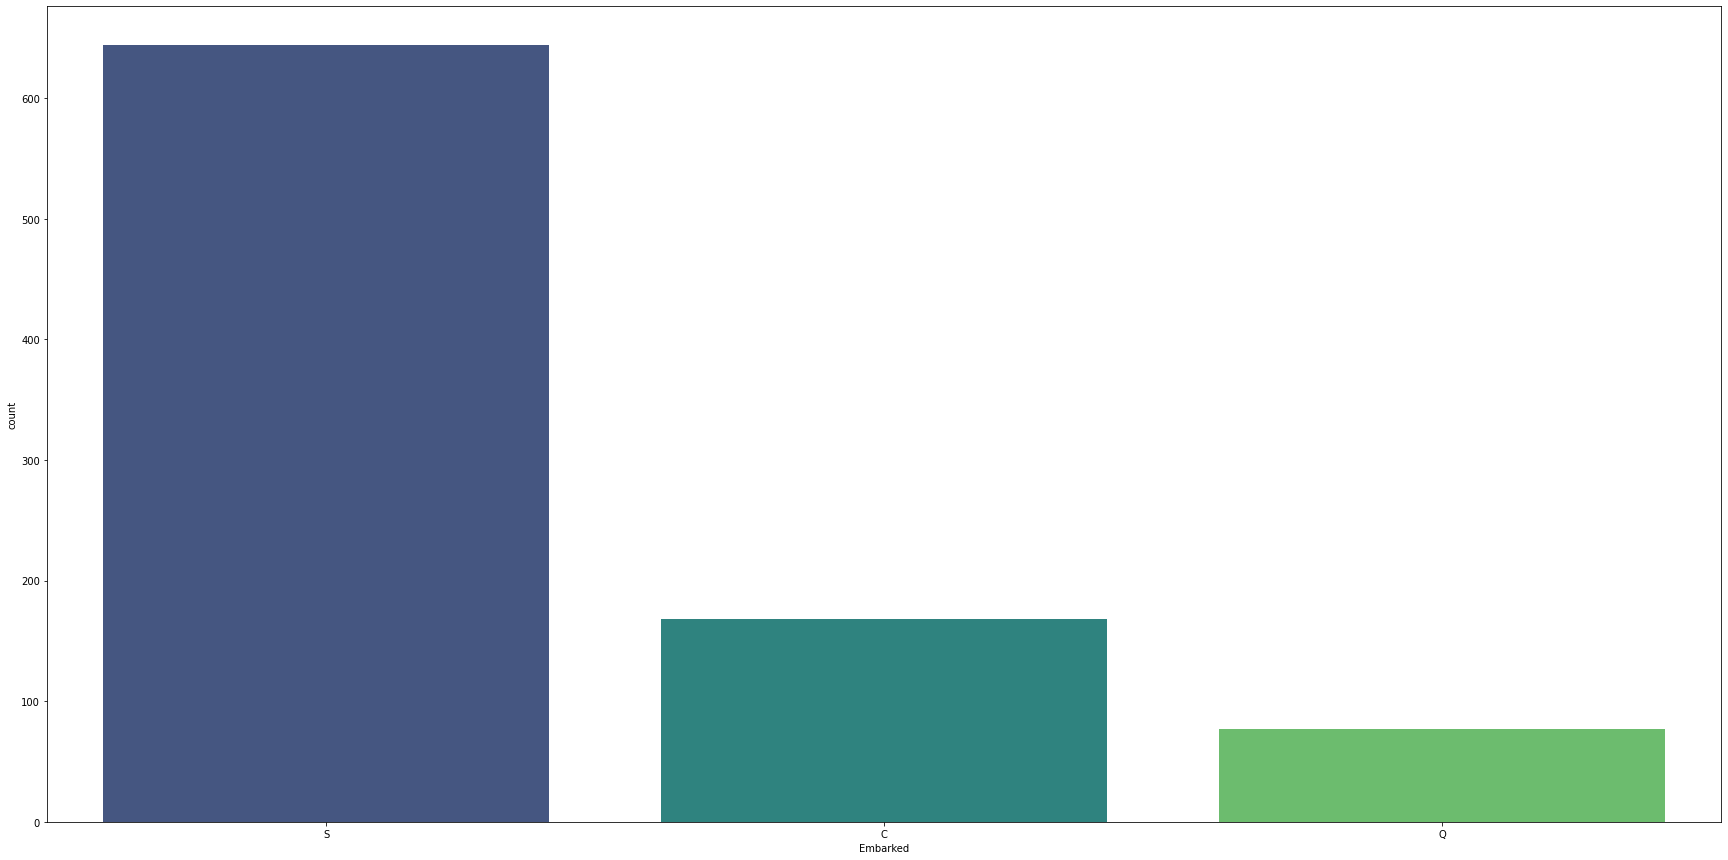

In [31]:
sns.countplot(data = train, x = 'Embarked', palette='viridis')

Distribution of passengers whether survived or not based from object value

<AxesSubplot:xlabel='Survived', ylabel='count'>

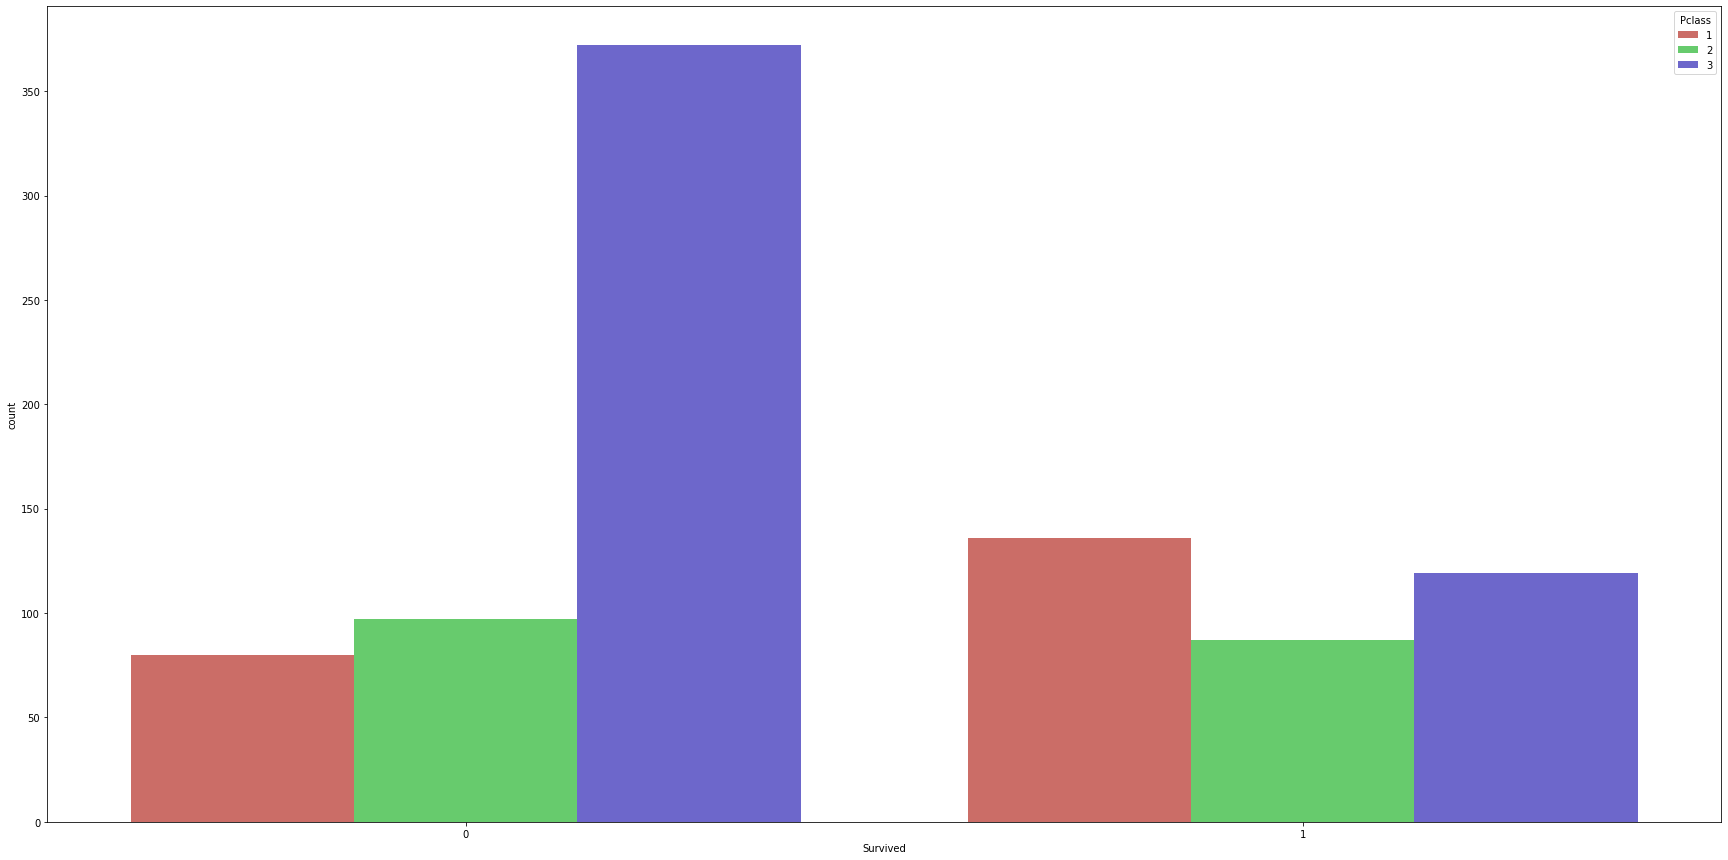

In [32]:
sns.countplot(x ="Survived", hue = 'Pclass', data = train, palette='hls')

<AxesSubplot:xlabel='Survived', ylabel='count'>

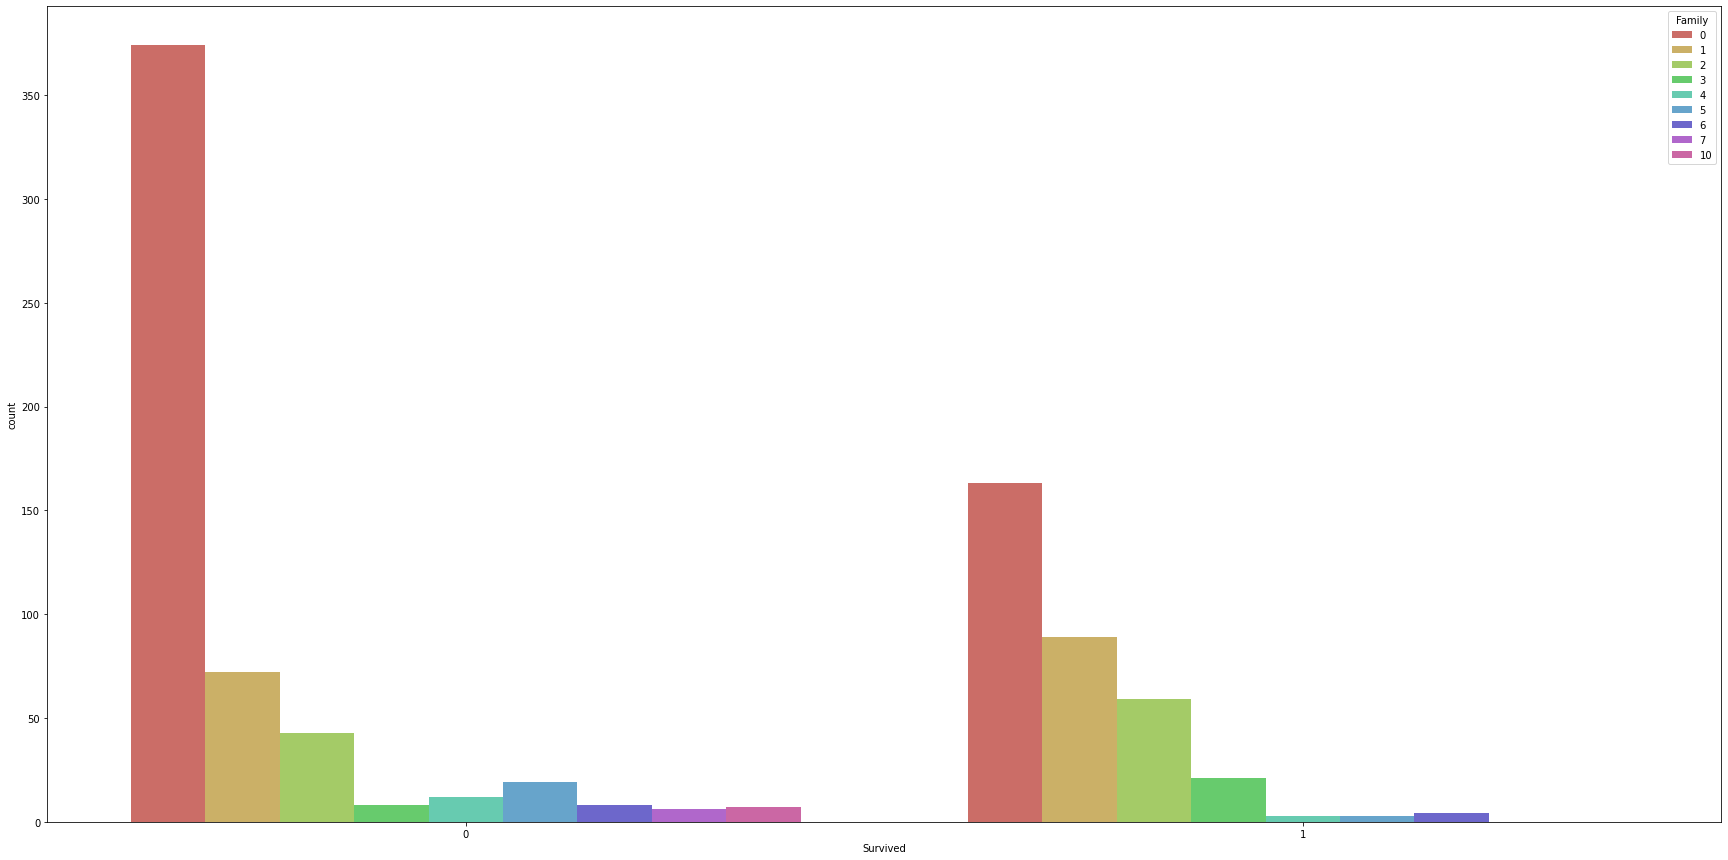

In [33]:
sns.countplot(x ="Survived", hue = 'Family', data = train, palette='hls')

<AxesSubplot:xlabel='Survived', ylabel='count'>

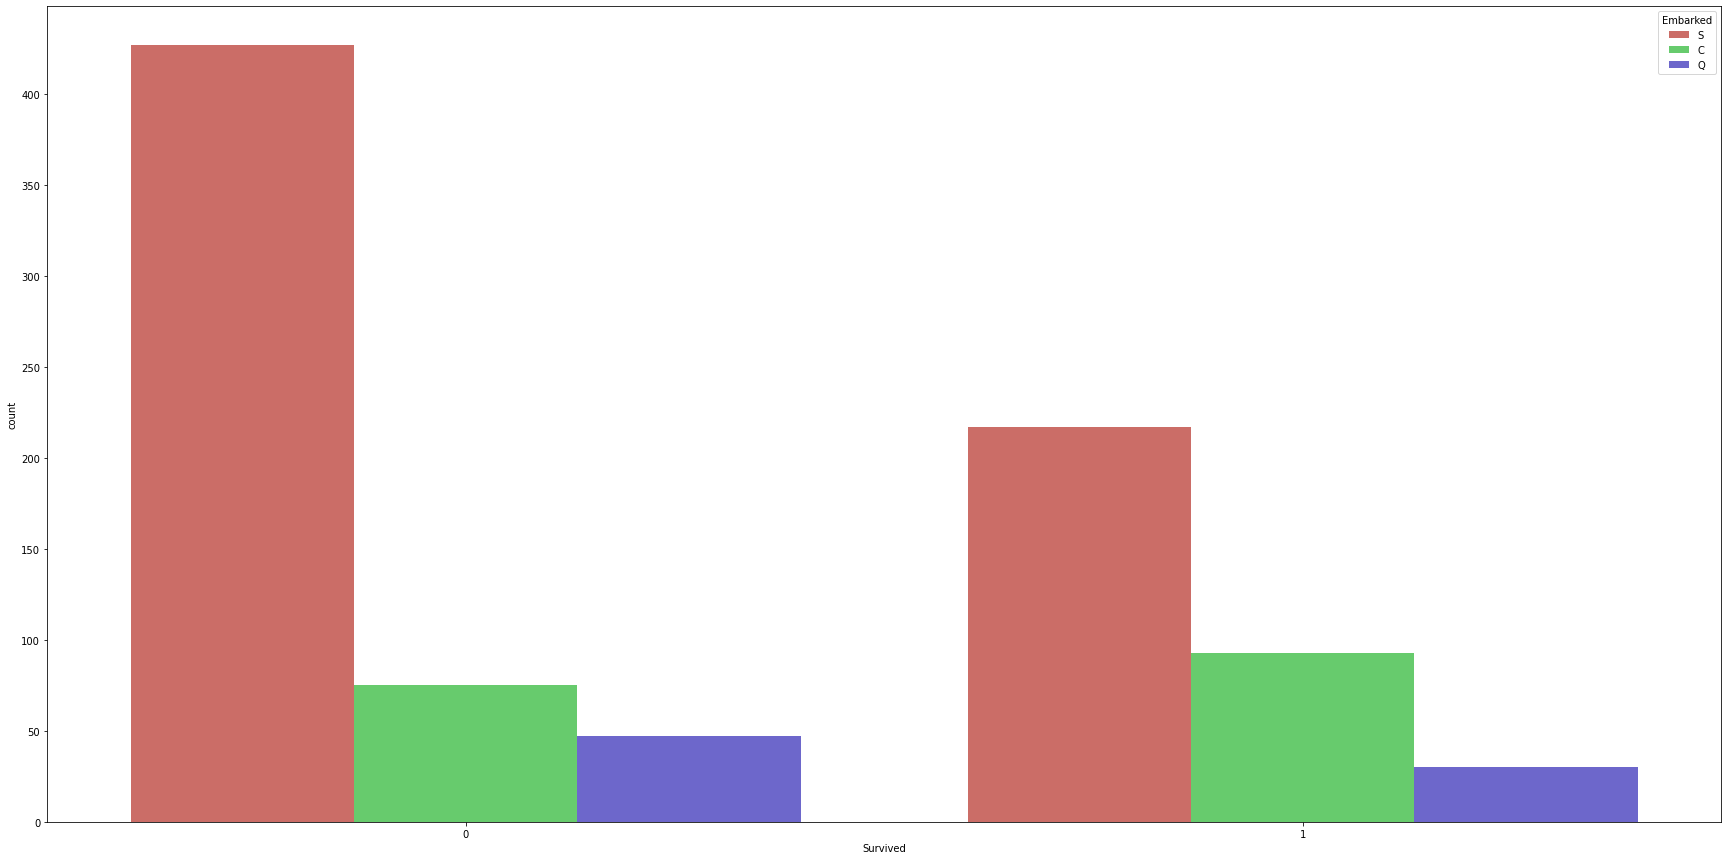

In [34]:
sns.countplot(x ="Survived", hue = 'Embarked', data = train, palette='hls')

<AxesSubplot:xlabel='Survived', ylabel='count'>

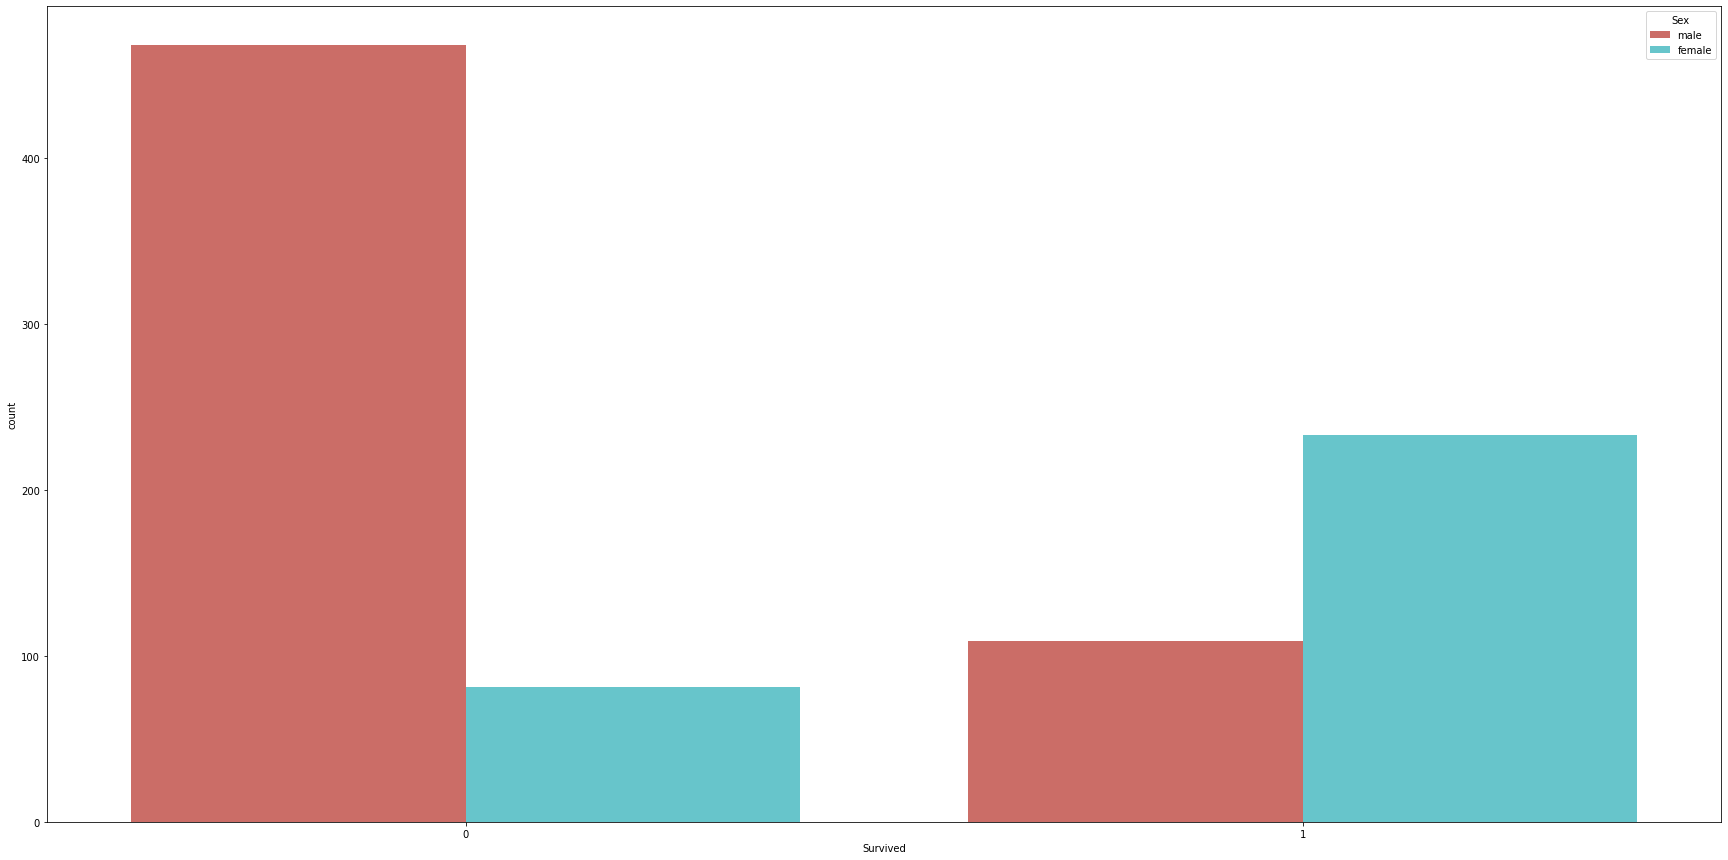

In [35]:
sns.countplot(x ="Survived", hue = 'Sex', data = train, palette='hls')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

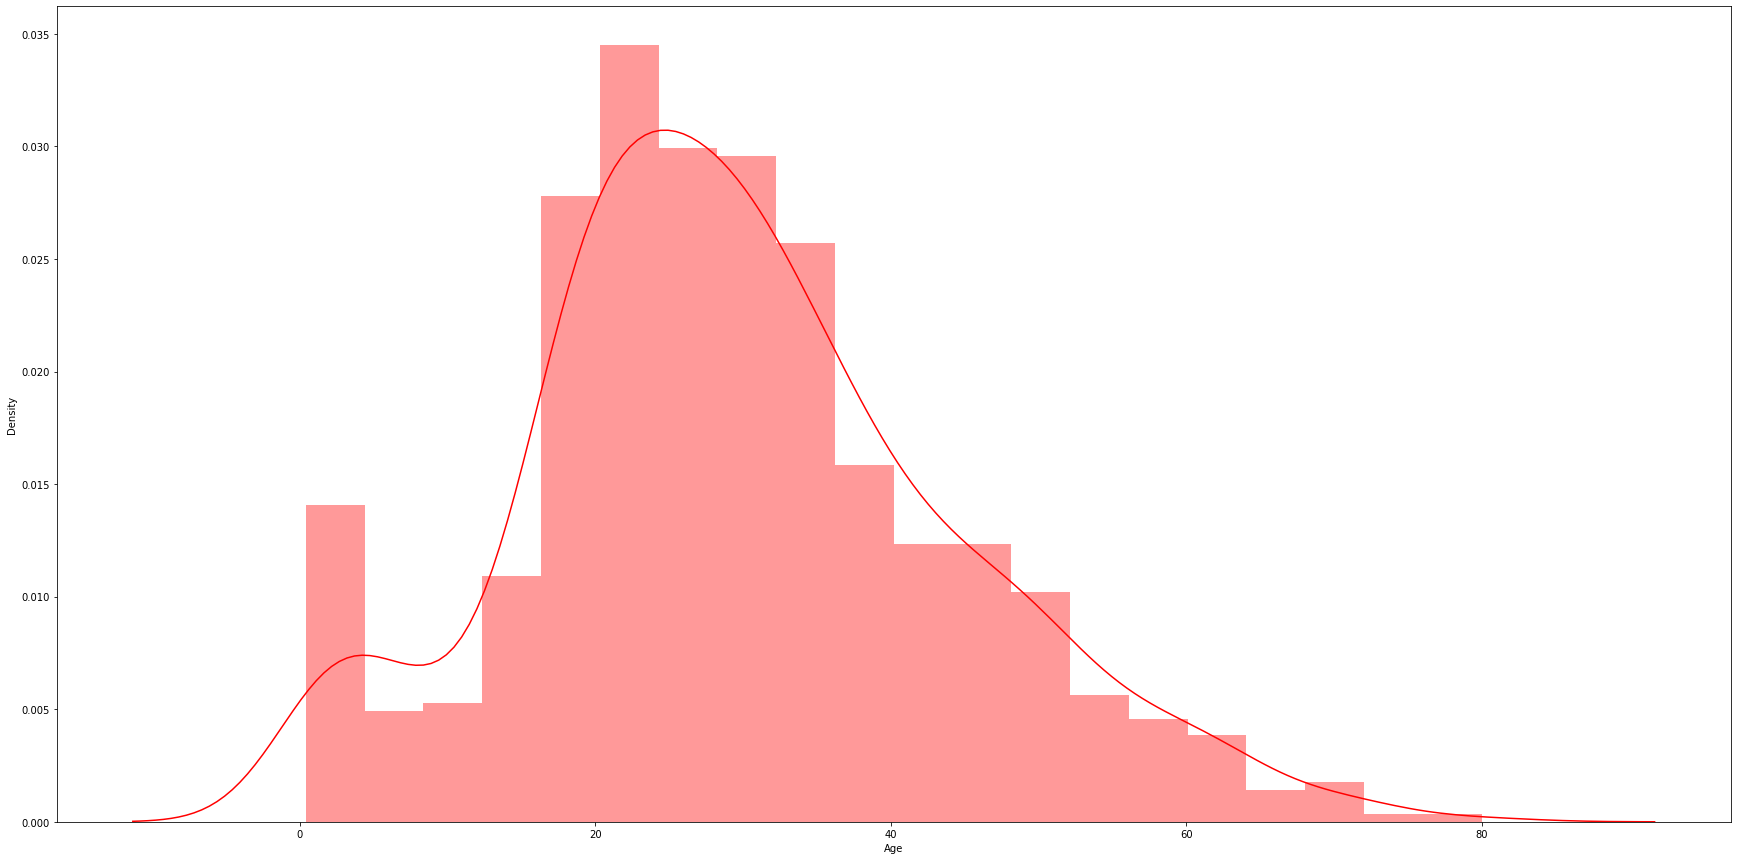

In [36]:
sns.distplot(train['Age'], color='red')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

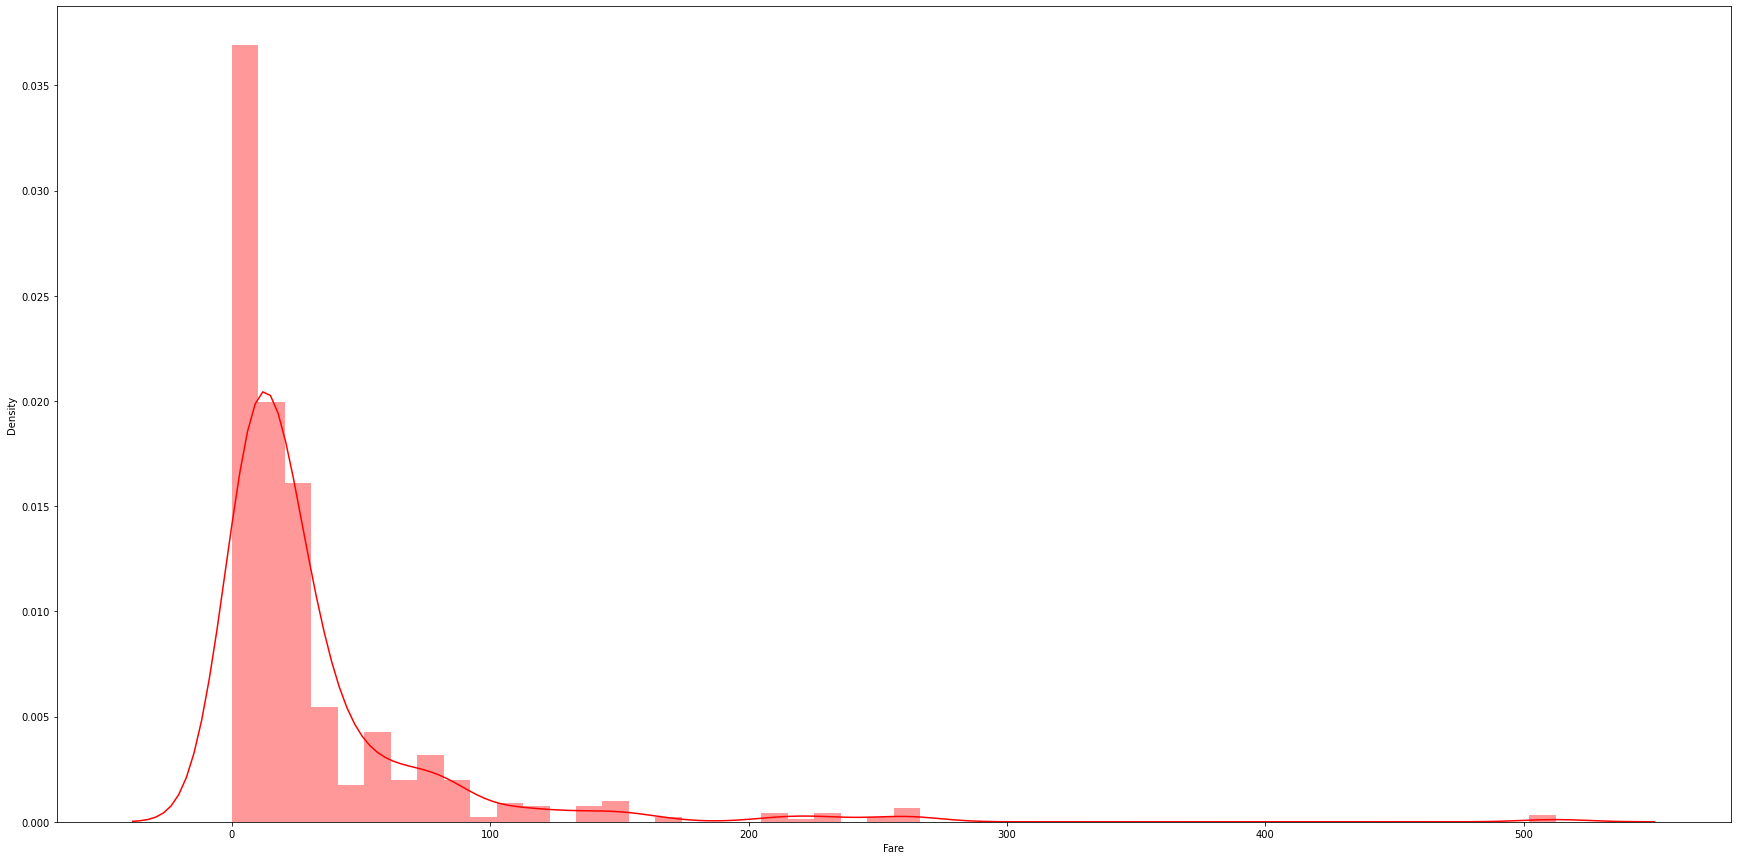

In [37]:
sns.distplot(train['Fare'], color='red')

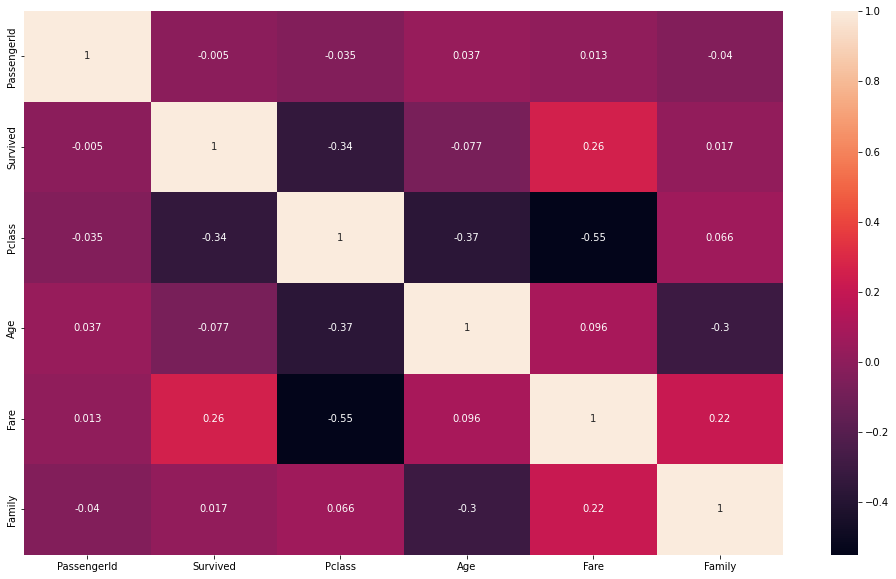

In [38]:
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

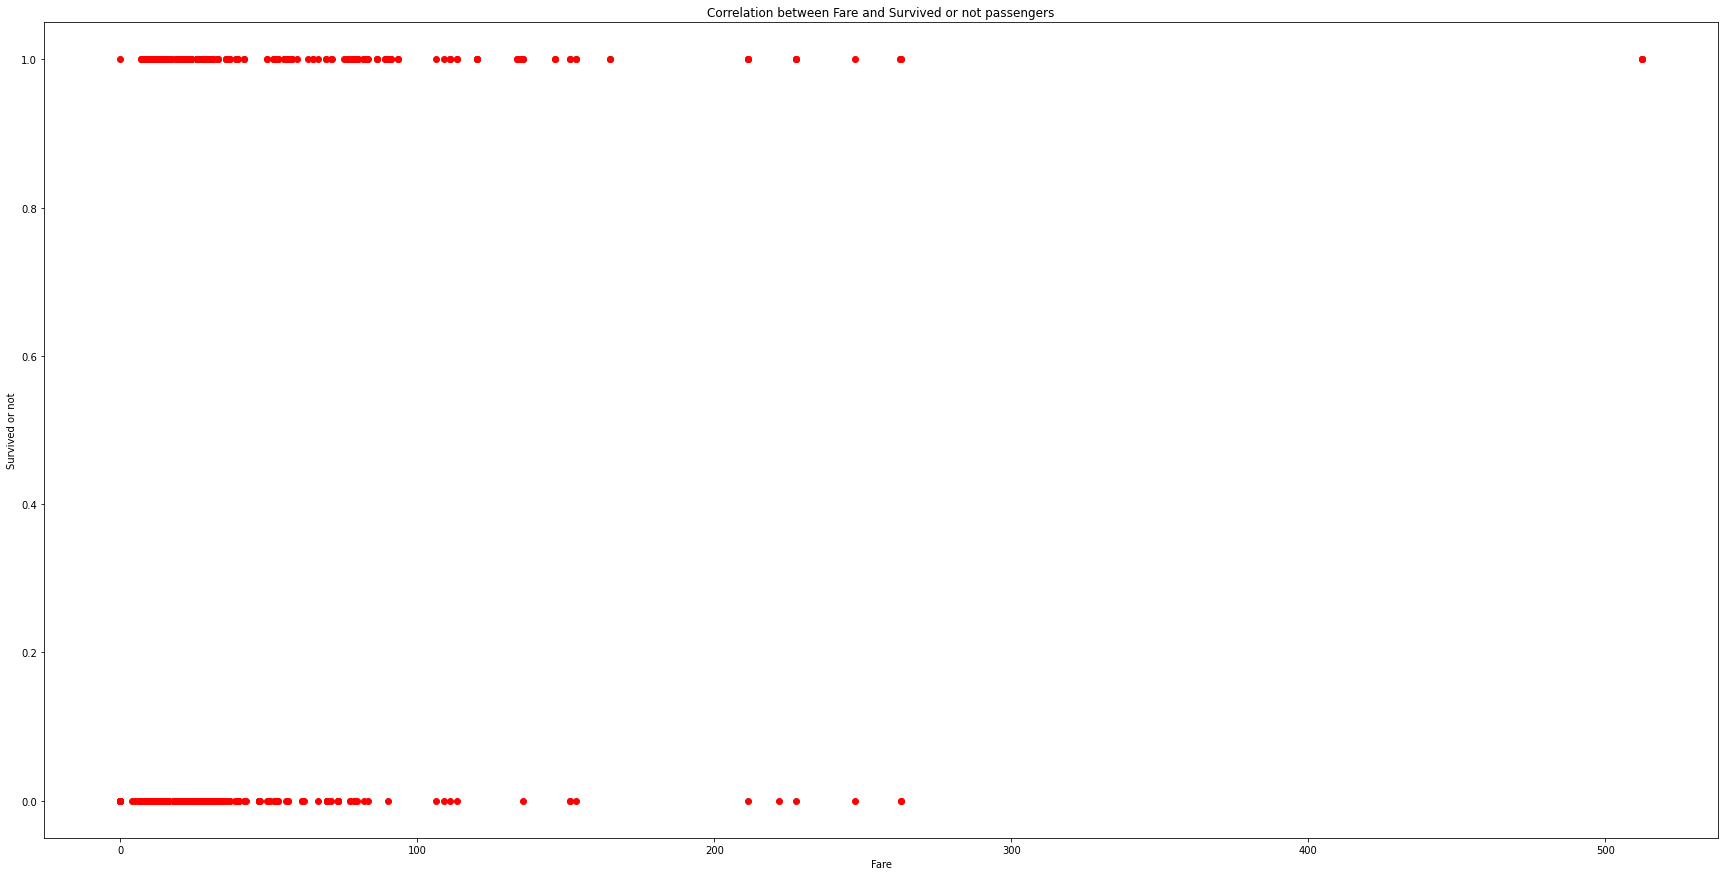

In [39]:
plt.scatter(train['Fare'], train['Survived'], c = 'red')
plt.xlabel('Fare')
plt.ylabel('Survived or not')
plt.title('Correlation between Fare and Survived or not passengers')
plt.show()

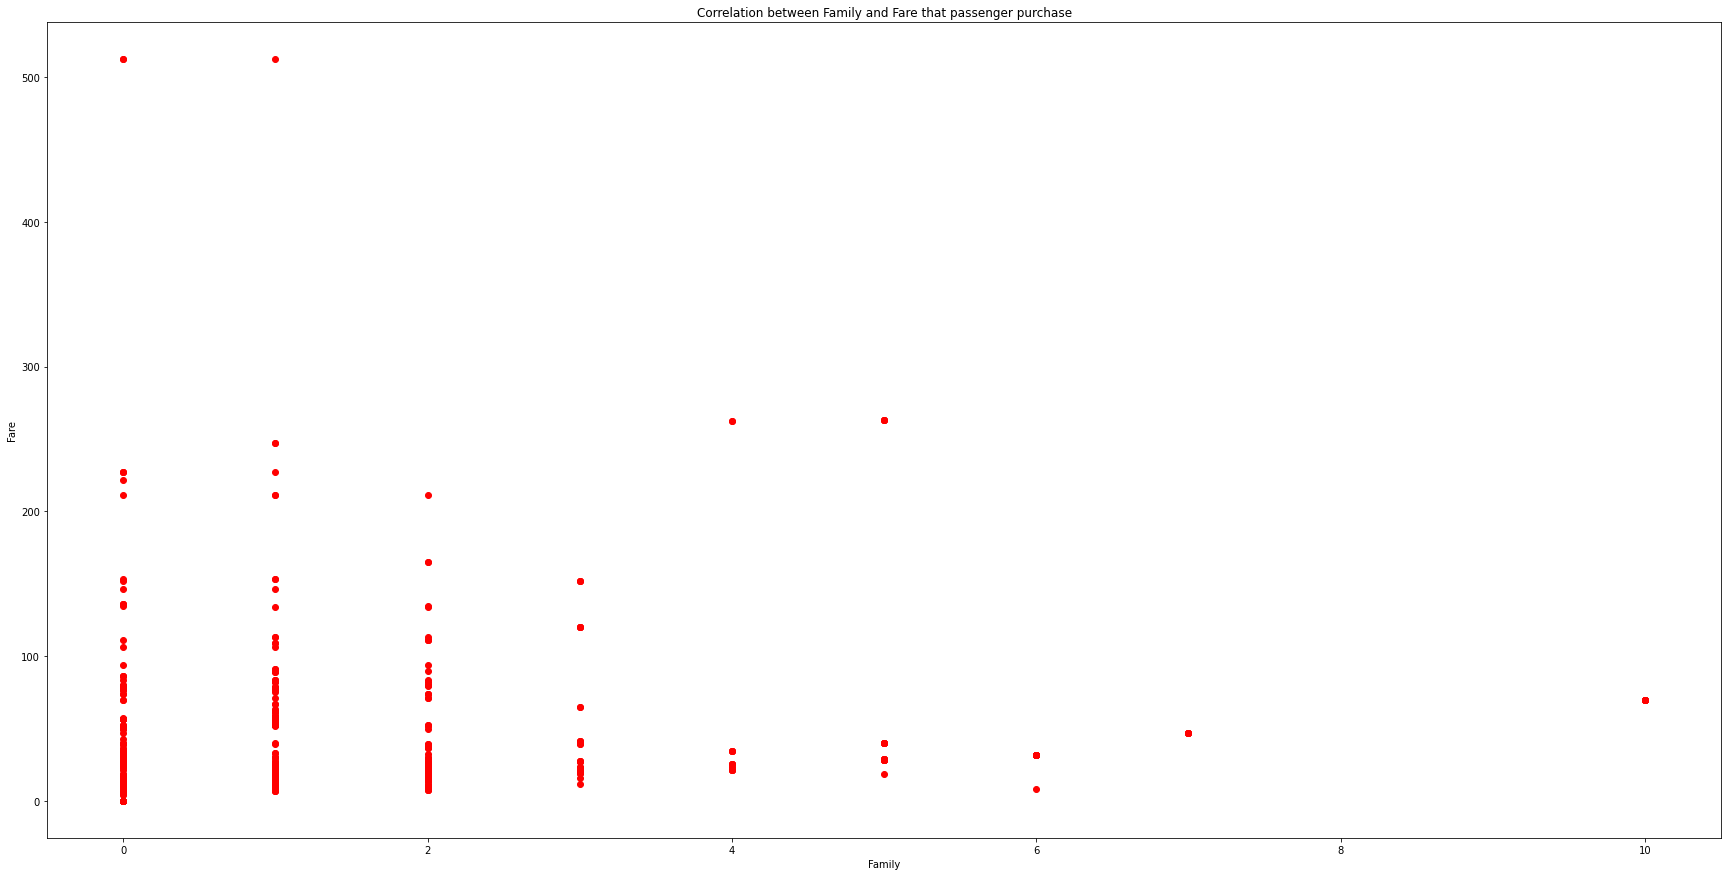

In [40]:
plt.scatter(train['Family'], train['Fare'], c = 'red')
plt.xlabel('Family')
plt.ylabel('Fare')
plt.title('Correlation between Family and Fare that passenger purchase')
plt.show()

In [41]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Family           0
dtype: int64

In [42]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [43]:
train.isna().sum().sum()

0

In [44]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Family          0
dtype: int64

In [45]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [46]:
test.isna().sum().sum()

0

In [47]:
train.duplicated().sum()

0

In [48]:
numeric_column

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Detect outliers

In [49]:
print(f'Rows efore outlier filter: {len(train)}')

filtered_entries = np.array([True] * len(train))
for col in ['Age','Fare']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries
    
train = train[filtered_entries]

print(f'Rows after outlier filter: {len(train)}')

Rows efore outlier filter: 891
Rows after outlier filter: 721


# Normalization numeric columns

In [50]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,721.0,448.056865,259.664486,1.0,220.0000,448.000000,674.0,891.0
Survived,721.0,0.337032,0.473024,0.0,0.0000,0.000000,1.0,1.0
Pclass,721.0,2.509015,0.717046,1.0,2.0000,3.000000,3.0,3.0
Age,721.0,28.476085,10.043466,3.0,22.0000,29.699118,33.0,54.0
Fare,721.0,17.389845,13.563036,0.0,7.8958,12.275000,26.0,65.0
Family,721.0,0.737864,1.371058,0.0,0.0000,0.000000,1.0,7.0


In [51]:
scaling_column =  ['Age','Fare','Family']

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
test[scaling_column] = scaler.fit_transform(test[scaling_column])

In [54]:
train[scaling_column] = scaler.fit_transform(train[scaling_column])

In [55]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.250000,1100.500000,1204.750000,1309.0
Pclass,418.0,2.265550,0.841838,1.0,1.000000,3.000000,3.000000,3.0
Age,418.0,0.396975,0.166617,0.0,0.301068,0.396975,0.469207,1.0
Fare,418.0,0.069540,0.108993,0.0,0.015412,0.028213,0.061484,1.0
Family,418.0,0.083971,0.151907,0.0,0.000000,0.000000,0.100000,1.0


In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,721.0,448.056865,259.664486,1.0,220.000000,448.000000,674.000000,891.0
Survived,721.0,0.337032,0.473024,0.0,0.000000,0.000000,1.000000,1.0
Pclass,721.0,2.509015,0.717046,1.0,2.000000,3.000000,3.000000,3.0
Age,721.0,0.499531,0.196931,0.0,0.372549,0.523512,0.588235,1.0
Fare,721.0,0.267536,0.208662,0.0,0.121474,0.188846,0.400000,1.0
Family,721.0,0.105409,0.195865,0.0,0.000000,0.000000,0.142857,1.0


# One hot encoding for categoric columns

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,0,3,male,0.372549,0.111538,S,0.142857
2,3,1,3,female,0.450980,0.121923,S,0.000000
3,4,1,1,female,0.627451,0.816923,S,0.142857
4,5,0,3,male,0.627451,0.123846,S,0.000000
5,6,0,3,male,0.523512,0.130128,Q,0.000000


In [58]:
train.nunique()

PassengerId    721
Survived         2
Pclass           3
Sex              2
Age             64
Fare           195
Embarked         3
Family           8
dtype: int64

In [59]:
test.nunique()

PassengerId    418
Pclass           3
Sex              2
Age             80
Fare           170
Embarked         3
Family           9
dtype: int64

In [60]:
categoric_column = ['Sex', 'Embarked']

In [61]:
train_encoded = pd.get_dummies(data = train[categoric_column], drop_first = True)
train_encoded

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
2,0,0,1
3,0,0,1
4,1,0,1
5,1,1,0
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [62]:
test_encoded = pd.get_dummies(data = test[categoric_column], drop_first = True)

In [63]:
test_encoded

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1
...,...,...,...
413,1,0,1
414,0,0,0
415,1,0,1
416,1,0,1


In [64]:
train = pd.concat(objs = [train, train_encoded], axis = 1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,male,0.372549,0.111538,S,0.142857,1,0,1
2,3,1,3,female,0.450980,0.121923,S,0.000000,0,0,1
3,4,1,1,female,0.627451,0.816923,S,0.142857,0,0,1
4,5,0,3,male,0.627451,0.123846,S,0.000000,1,0,1
5,6,0,3,male,0.523512,0.130128,Q,0.000000,1,1,0


In [66]:
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [67]:
test = pd.concat(objs = [test, test_encoded], axis = 1)

In [68]:
test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [69]:
test.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,892,3,0.452723,0.015282,0.0,1,1,0
1,893,3,0.617566,0.013663,0.1,0,0,1
2,894,2,0.815377,0.018909,0.0,1,1,0
3,895,3,0.353818,0.016908,0.0,1,0,1
4,896,3,0.287881,0.023984,0.2,0,0,1


In [70]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,0.372549,0.111538,0.142857,1,0,1
2,3,1,3,0.450980,0.121923,0.000000,0,0,1
3,4,1,1,0.627451,0.816923,0.142857,0,0,1
4,5,0,3,0.627451,0.123846,0.000000,1,0,1
5,6,0,3,0.523512,0.130128,0.000000,1,1,0


# Split X and y variable

In [71]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

print("Shape of X", X.shape)
print("Shape of y:", y.shape)

Shape of X (721, 8)
Shape of y: (721,)


In [72]:
y.value_counts()

0    478
1    243
Name: Survived, dtype: int64

Imbalanced data! Mayority of data is passengers who not survived!

<AxesSubplot:ylabel='Survived'>

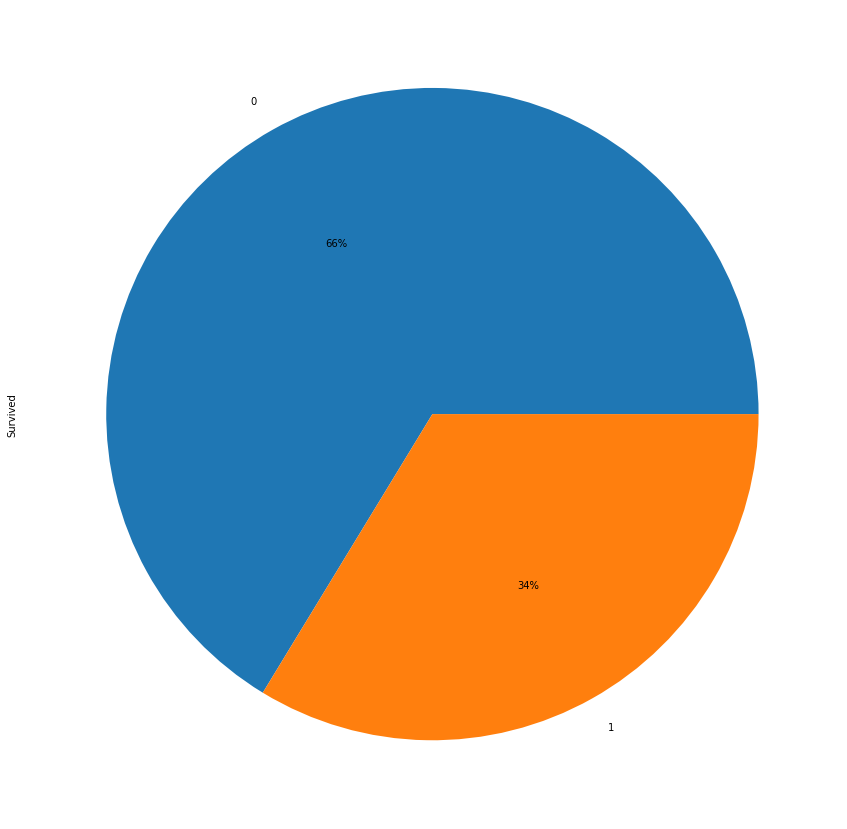

In [73]:
y.value_counts().plot(kind='pie', autopct='%1.0f%%')

# SMOTE
for handling imbalanced data, implement oversampling for dataset.

In [74]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
print("Shape of X before Oversampling", X.shape)
print("Shape of y before Oversampling:", y.shape)

print("Count of survived passengers (1) before Oversampling:", sum(y_train==1))
print("Count of not survived passengers (0) before Oversampling:", sum(y_train==0))

Shape of X before Oversampling (721, 8)
Shape of y before Oversampling: (721,)
Count of survived passengers (1) before Oversampling: 190
Count of not survived passengers (0) before Oversampling: 386


In [77]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [78]:
print("Shape of X after Oversampling", X_train_res.shape)
print("Shape of y after Oversampling:", y_train_res.shape)

print("Count of survived passengers (1) after Oversampling:", sum(y_train_res==1))
print("Count of not survived passengers (0) after Oversampling:", sum(y_train_res==0))

Shape of X after Oversampling (772, 8)
Shape of y after Oversampling: (772,)
Count of survived passengers (1) after Oversampling: 386
Count of not survived passengers (0) after Oversampling: 386


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model = DecisionTreeClassifier()
model = model.fit(X_train_res, y_train_res.ravel())
y_pred = model.predict(X_test)

In [81]:
print('Training Accuracy :', model.score(X_train_res, y_train_res.ravel()))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7103448275862069


In [82]:
from sklearn.metrics import confusion_matrix, classification_report


Confusion matrix:


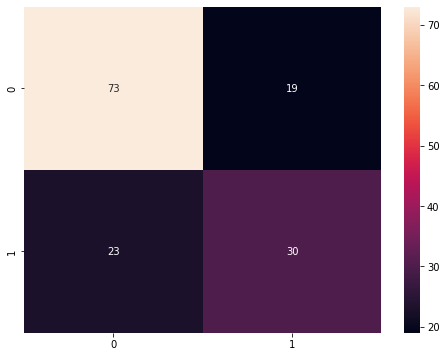

In [83]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [84]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        92
           1       0.61      0.57      0.59        53

    accuracy                           0.71       145
   macro avg       0.69      0.68      0.68       145
weighted avg       0.71      0.71      0.71       145



# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logreg = LogisticRegression() 
logreg = logreg.fit(X_train_res, y_train_res.ravel())
y_pred = logreg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [87]:
print('Training Accuracy :', logreg.score(X_train_res, y_train_res.ravel()))
print('Testing Accuracy :', logreg.score(X_test, y_test))

Training Accuracy : 0.8264248704663213
Testing Accuracy : 0.7448275862068966



Confusion matrix:


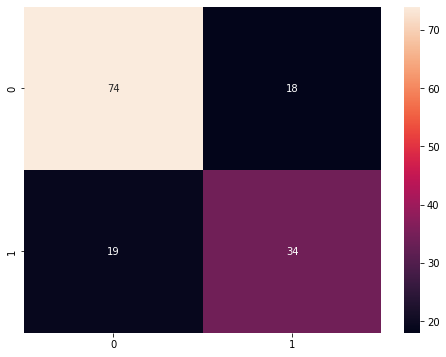

In [88]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [89]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        92
           1       0.65      0.64      0.65        53

    accuracy                           0.74       145
   macro avg       0.72      0.72      0.72       145
weighted avg       0.74      0.74      0.74       145



# Support Vector Classification (SVC)

In [90]:
from sklearn.svm import SVC

In [91]:
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train_res, y_train_res.ravel())
y_pred = classifier.predict(X_test)

In [92]:
print('Training Accuracy :', classifier.score(X_train_res, y_train_res.ravel()))  
print('Testing Accuracy :', classifier.score(X_test, y_test)) 

Training Accuracy : 0.5479274611398963
Testing Accuracy : 0.46206896551724136



Confusion matrix


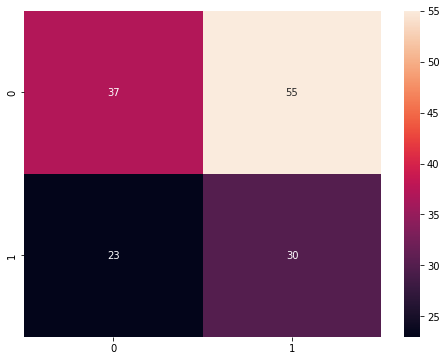

In [93]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [94]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.62      0.40      0.49        92
           1       0.35      0.57      0.43        53

    accuracy                           0.46       145
   macro avg       0.48      0.48      0.46       145
weighted avg       0.52      0.46      0.47       145



Based on f1 score, the best model is decision tree and logistic regression which are 0.74
Based from False Negative (FN) prediction, the best model is Logistic Regression with the most less FN prediction which is only 19. 

# Implement Logistic Regression model

In [95]:
result_logreg = logreg.predict(test)

In [96]:
df_result_logreg = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': result_logreg})

In [97]:
df_result_logreg

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [98]:
df_result_logreg['Survived'].value_counts()

0    267
1    151
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

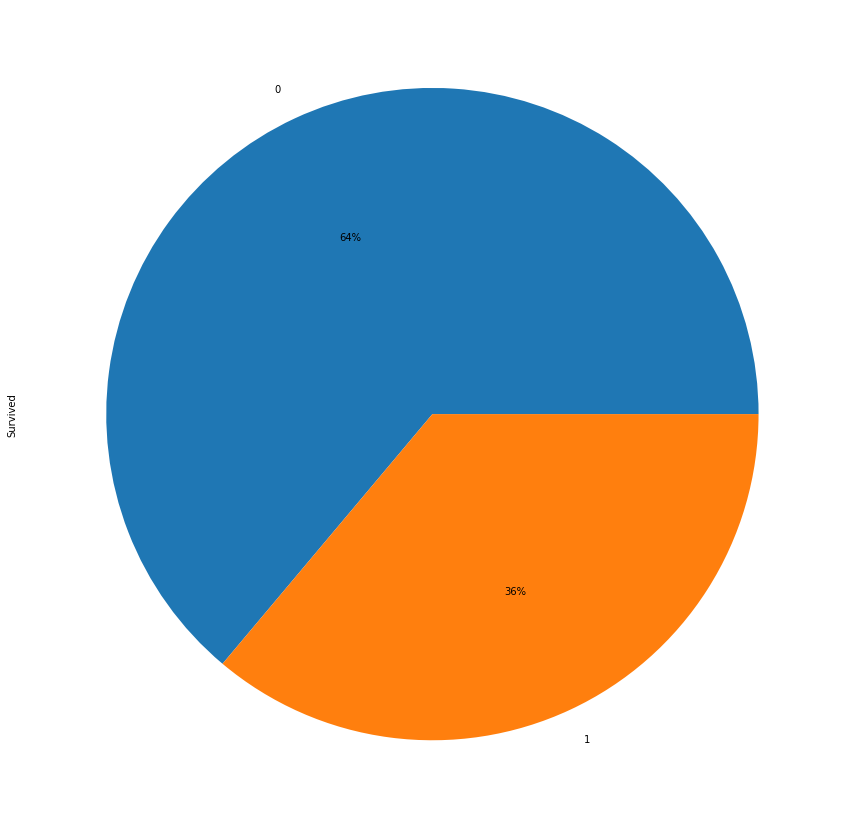

In [99]:
df_result_logreg['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='Survived'>

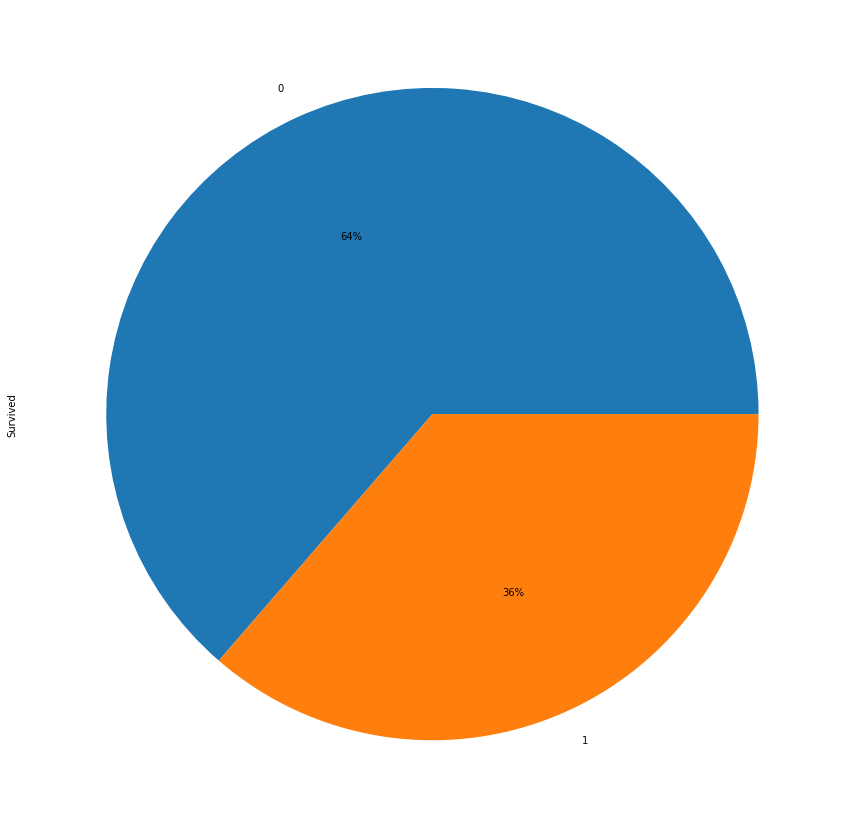

In [100]:
example['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [101]:
df_result_logreg.to_csv('submission_6.csv', index=False)

# Implement with Decision Tree

In [102]:
result_dtr = model.predict(test)

In [103]:
df_result_dtr = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': result_dtr})

In [104]:
df_result_dtr

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
df_result_dtr['Survived'].value_counts()

0    234
1    184
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

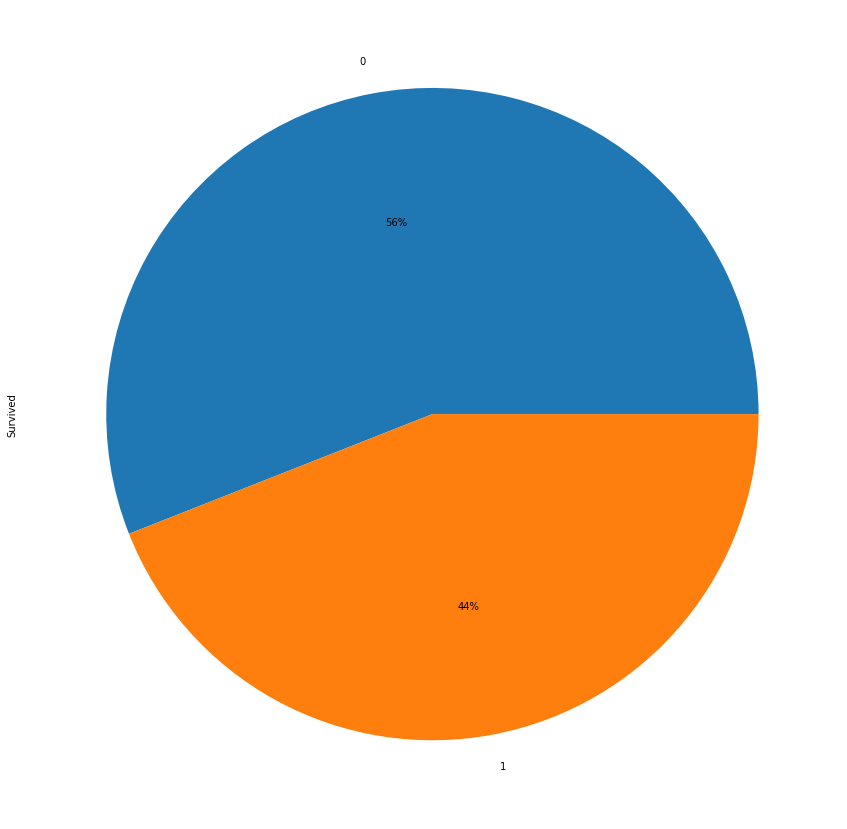

In [106]:
df_result_dtr['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Implement with SVC

In [107]:
result_svc = classifier.predict(test)

In [108]:
df_result_svc = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': result_svc})

In [109]:
df_result_svc['Survived'].value_counts()

0    223
1    195
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

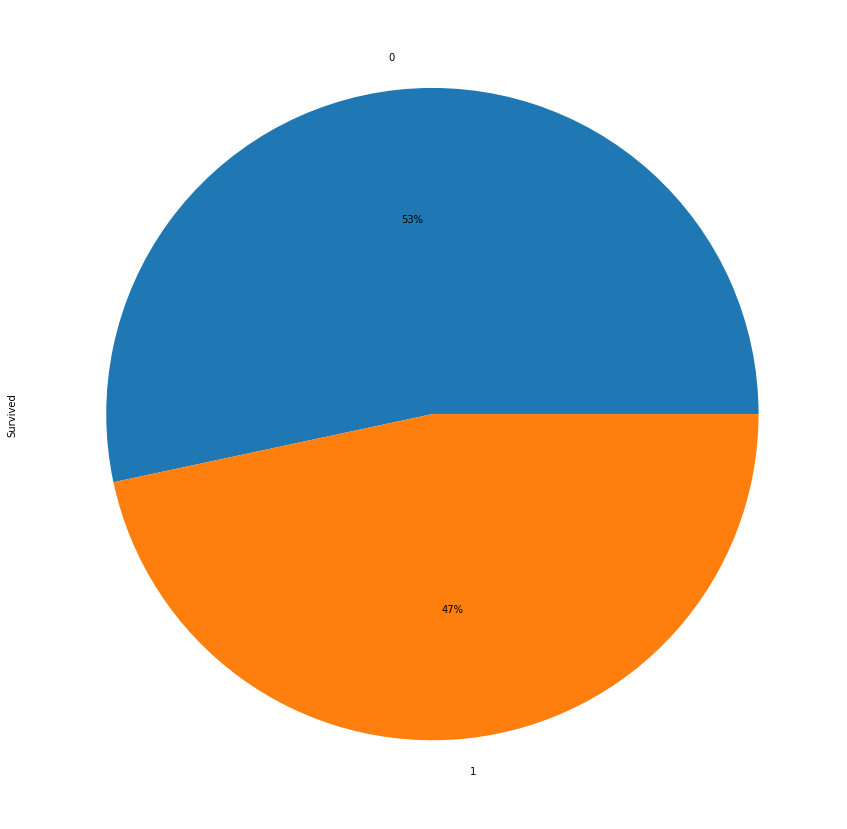

In [110]:
df_result_svc['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

**Conclusion**
The best predict is using Logistic Regression for submission in Titanic Challenge. I got score 0.77272 with this notebook.